In [ ]:
import os

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cada vez que intentaba correr el codigo al dia siguiente, me marcaba error, tenia que borrar todo y hacerlo desde el inicio.
Al correr el  make clean, aun no me permitía correrlo

In [ ]:
os.chdir('/content/drive/MyDrive/')
!mkdir Cosmology2022

In [ ]:
os.chdir('/content/drive/MyDrive/Cosmology2022')

In [ ]:
%%shell
## Do only once
git clone https://github.com/lesgourg/class_public.git

Cloning into 'class_public'...
remote: Enumerating objects: 24624, done.
remote: Total 24624 (delta 0), reused 0 (delta 0), pack-reused 24624
Receiving objects: 100% (24624/24624), 676.31 MiB | 12.40 MiB/s, done.
Resolving deltas: 100% (16297/16297), done.
Checking out files: 100% (272/272), done.


In [ ]:
%%shell
ls
#class_public
#cd class_public

class_public


In [ ]:
os.chdir('/content/drive/MyDrive/Cosmology2022/class_public') # cambiar de directorio

In [ ]:
%%shell
make

if ! [ -e /content/drive/MyDrive/Cosmology2022/class_public/build ]; then mkdir /content/drive/MyDrive/Cosmology2022/class_public/build ; mkdir /content/drive/MyDrive/Cosmology2022/class_public/build/lib; fi;
touch build/.base
cd /content/drive/MyDrive/Cosmology2022/class_public/build;gcc -O3 -fopenmp -g -fPIC -D__CLASSDIR__='"/content/drive/MyDrive/Cosmology2022/class_public"' -DHYREC -I../include -I../external/RecfastCLASS -I../external/heating -I../external/HyRec2020 -c ../tools/growTable.c -o growTable.o
cd /content/drive/MyDrive/Cosmology2022/class_public/build;gcc -O3 -fopenmp -g -fPIC -D__CLASSDIR__='"/content/drive/MyDrive/Cosmology2022/class_public"' -DHYREC -I../include -I../external/RecfastCLASS -I../external/heating -I../external/HyRec2020 -c ../tools/dei_rkck.c -o dei_rkck.o
cd /content/drive/MyDrive/Cosmology2022/class_public/build;gcc -O3 -fopenmp -g -fPIC -D__CLASSDIR__='"/content/drive/MyDrive/Cosmology2022/class_public"' -DHYREC -I../include -I../external/RecfastCLASS

In [ ]:
%%shell
ls

base_2015_plikHM_TT_lowTEB_lensing.ini	       main
base_2018_plikHM_TTTEEE_lowl_lowE_lensing.ini  Makefile
build					       myevolution.dat
class					       myselection.dat
CLASS_rename.py				       notebooks
cl_permille.pre				       output
cl_ref.pre				       pk_ref.pre
cpp					       plot_CLASS_output.m
CPU.py					       psd_FD_single.dat
default.ini				       python
doc					       README.md
explanatory.ini				       scripts
external				       source
include					       test
libclass.a				       tools


Crear copia de default.ini, el cual es el que vamos a usar

copia realizada después de modificar el yes en background, llamada defaultCOPIA.ini

La siguiente linea de código es donde me revoca los permisos y tengo que subir y clonar el github nuevamenete.

In [ ]:
%%shell
./class defaultCOPIA.ini

Reading input parameters
 -> matched budget equations by adjusting Omega_Lambda = 0.690026
Running CLASS version v3.2.0
Computing background
 -> age = 13.770598 Gyr
 -> conformal age = 14151.897989 Mpc
 -> N_eff = 3.044 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 3405.751104
    corresponding to conformal time = 112.722902 Mpc
Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775232
    corresponding to conformal time = 280.650005 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1085.129318
    giving an angle 100*theta_* = 1.044144
 -> baryon drag stops at z = 1059.921811
    corresponding to conformal time = 286.316116 Mpc
    with comoving sound horizon rs = 147.071382 Mpc


En output se guardan los archivos que vamos obteniendo cuando corremos el código.

In [ ]:
%%shell
more output/defaultCOPIA00_background.dat
##nos dice que datos guardó

# Table of selected background quantities
# All densities are multiplied by (8piG/3) (below, shortcut notation (.) for thi
s factor) 
# Densities are in units [Mpc^-2] while all distances are in [Mpc]. 
#    1:z                      2:proper time [Gyr]      3:conf. time [Mpc]       
4:H [1/Mpc]              5:comov. dist.           6:ang.diam.dist.         7:lum
. dist.             8:comov.snd.hrz.         9:(.)rho_g              10:(.)rho_b
              11:(.)rho_cdm            12:(.)rho_lambda         13:(.)rho_ur    
         14:(.)rho_crit           15:(.)rho_tot            16:(.)p_tot          
    17:(.)p_tot_prime        18:gr.fac. D             19:gr.fac. f          
       1.000000000000e+14       7.559518509157e-26       4.634785000235e-09     
  2.157256292802e+22       1.415189798880e+04       1.415189798880e-10       1.4
15189798880e+18       2.676317464532e-09       2.751560535470e+44       2.490422
367464e+33       1.336376166075e+34       3.530299370118e-08       1.902

****************************************
Con: 

default_cl_dat graficar columna 1 (multipole momentum) y columna 2, que es la temperatura. radiacion cosmica de fondo

default_lensed no lo necesitamos

default_pk.dat Graficando una con la otra, reproducimos espectro de potencias de la materia




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


In [ ]:
ruta = '/content/drive/MyDrive/Cosmology2022/class_public/output/'
nombreArchivo = 'defaultCOPIA00_pk.dat'
data = np.loadtxt(ruta + nombreArchivo)
print(data)

[[1.04205722e-05 4.83353726e+01]
 [2.32696740e-05 1.05030150e+02]
 [3.61637300e-05 1.60800616e+02]
 ...
 [8.23487454e-01 1.08616886e+02]
 [9.25123961e-01 8.34095280e+01]
 [1.08687747e+00 5.75817010e+01]]


In [ ]:
k = []
p=[]
for fila in data:
  k_simple = fila[0]
  p_simple = fila[1]
  k.append(k_simple)
  p.append(p_simple)

print(k)
print(p)

[1.042057218184e-05, 2.326967396011e-05, 3.616373003078e-05, 4.913726118005e-05, 6.222535629174e-05, 7.546398368554e-05, 8.889031236246e-05, 0.0001025430474106, 0.000116462783857, 0.0001306923832855, 0.0001452773775457, 0.0001602664038245, 0.0001757116751758, 0.0001916694902516, 0.0002082007853352, 0.0002253717307374, 0.0002432543719999, 0.0002619273139533, 0.0002814764422309, 0.0003019956720255, 0.0003235877073292, 0.0003463647852096, 0.0003704493684977, 0.0003959747363138, 0.0004230854051645, 0.0004519372943754, 0.0004826975296699, 0.0005155437601784, 0.0005506628509895, 0.0005882488111729, 0.0006284998331605, 0.0006716143612428, 0.0007177861811893, 0.0007671986317901, 0.0008200181765813, 0.0008763877232654, 0.0009364202109279, 0.001000193065331, 0.001067744116788, 0.001139069464862, 0.001214123566691, 0.001292821557253, 0.001375043536459, 0.001460640338289, 0.001549440173132, 0.00164125551956, 0.001735889720631, 0.001833142878533, 0.001932816801141, 0.002034718902449, 0.002138665076

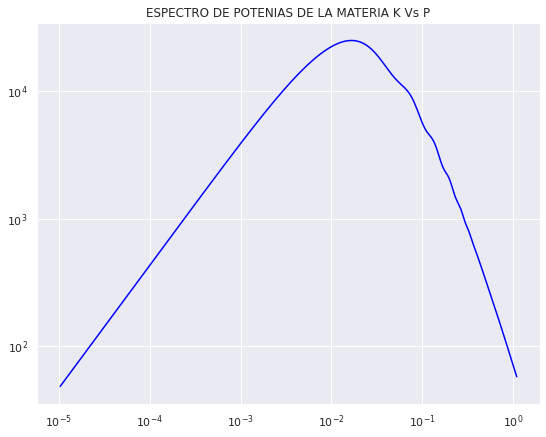

In [ ]:
plt.rcParams["figure.figsize"] = (9,7)
plt.plot(k, p, color = "blue")
plt.xscale("log")
plt.yscale("log")
plt.title("ESPECTRO DE POTENIAS DE LA MATERIA K Vs P")
plt.show()

In [ ]:
!less output/defaultCOPIA00_background.dat #PARA CHECAR QUE ES ADA COLUMNA DEL ARCHIVO DE BACKGROUND

# Table of selected background quantities
# All densities are multiplied by (8piG/3) (below, shortcut notation (.) for thi s factor) 
# Densities are in units [Mpc^-2] while all distances are in [Mpc]. 
#    1:z                      2:proper time [Gyr]      3:conf. time [Mpc]        4:H [1/Mpc]              5:comov. dist.           6:ang.diam.dist.         7:lum . dist.             8:comov.snd.hrz.         9:(.)rho_g              10:(.)rho_b               11:(.)rho_cdm            12:(.)rho_lambda         13:(.)rho_ur              14:(.)rho_crit           15:(.)rho_tot            16:(.)p_tot               17:(.)p_tot_prime        18:gr.fac. D             19:gr.fac. f          
       1.000000000000e+14       7.559518509157e-26       4.634785000235e-09        2.157256292802e+22       1.415189798880e+04       1.415189798880e-10       1.4 15189798880e+18       2.676317464532e-09       2.751560535470e+44       2.490422 367464e+33       1.336376166075e+34       3.530299370118e-08   

In [ ]:
ruta = '/content/drive/MyDrive/Cosmology2022/class_public/output/'
nombreArchivo = 'defaultCOPIA00_cl.dat'
data = np.loadtxt(ruta + nombreArchivo).T
print(data)

[[ 2.00000000e+00  3.00000000e+00  4.00000000e+00 ...  2.99800000e+03
   2.99900000e+03  3.00000000e+03]
 [ 1.38167339e-10  1.30668767e-10  1.23600281e-10 ...  3.44577518e-12
   3.44279246e-12  3.43979795e-12]
 [ 4.17949976e-15  5.35434969e-15  4.62886580e-15 ...  1.14747351e-13
   1.13755521e-13  1.12761654e-13]
 ...
 [ 8.23634515e-09  5.06876377e-09  3.52474405e-09 ...  4.86341749e-17
   4.85499343e-17  4.84658929e-17]
 [ 4.53574826e-10  3.21736879e-10  2.43699719e-10 ...  7.04717706e-18
   7.10346567e-18  7.16070448e-18]
 [-1.84236001e-12 -1.39491996e-12 -9.12741962e-13 ...  4.76277310e-19
   4.85998510e-19  4.95968235e-19]]


In [ ]:
'''l = []
n = []
for fila in data:
  l_simple = fila[0]
  n_simple = fila[1]
  l.append(l_simple)
  n.append(n_simple)

print(l)
print(n)'''

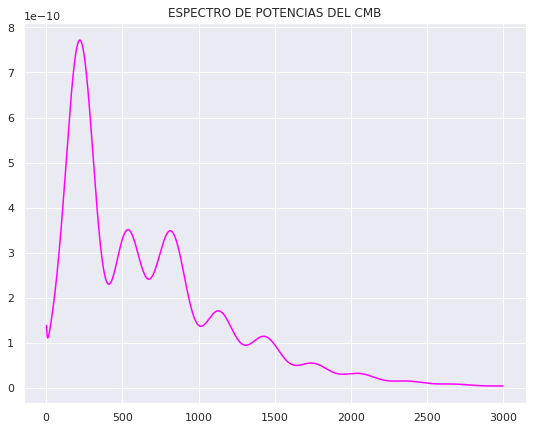

In [ ]:
plt.rcParams["figure.figsize"] = (9,7)
plt.plot(data[0], data[1], color = "magenta") #DATA0 = Z DATA1= TIEMPO PROPIO
plt.title("ESPECTRO DE POTENCIAS DEL CMB")
plt.show()

In [ ]:
ruta = '/content/drive/MyDrive/Cosmology2022/class_public/output/'
nombreArchivo = 'defaultCOPIA00_background.dat'
dataBackground = np.loadtxt(ruta + nombreArchivo).T
print(data)

[[ 2.00000000e+00  3.00000000e+00  4.00000000e+00 ...  2.99800000e+03
   2.99900000e+03  3.00000000e+03]
 [ 1.38167339e-10  1.30668767e-10  1.23600281e-10 ...  3.44577518e-12
   3.44279246e-12  3.43979795e-12]
 [ 4.17949976e-15  5.35434969e-15  4.62886580e-15 ...  1.14747351e-13
   1.13755521e-13  1.12761654e-13]
 ...
 [ 8.23634515e-09  5.06876377e-09  3.52474405e-09 ...  4.86341749e-17
   4.85499343e-17  4.84658929e-17]
 [ 4.53574826e-10  3.21736879e-10  2.43699719e-10 ...  7.04717706e-18
   7.10346567e-18  7.16070448e-18]
 [-1.84236001e-12 -1.39491996e-12 -9.12741962e-13 ...  4.76277310e-19
   4.85998510e-19  4.95968235e-19]]


In [ ]:
!less output/defaultCOPIA02_background.dat

# Table of selected background quantities
# All densities are multiplied by (8piG/3) (below, shortcut notation (.) for thi s factor) 
# Densities are in units [Mpc^-2] while all distances are in [Mpc]. 
#    1:z                      2:proper time [Gyr]      3:conf. time [Mpc]        4:H [1/Mpc]              5:comov. dist.           6:ang.diam.dist.         7:lum . dist.             8:comov.snd.hrz.         9:(.)rho_g              10:(.)rho_b               11:(.)rho_cdm            12:(.)rho_lambda         13:(.)rho_ur              14:(.)rho_crit           15:(.)rho_tot            16:(.)p_tot               17:(.)p_tot_prime        18:gr.fac. D             19:gr.fac. f          
       1.000000000000e+14       7.559518509157e-26       4.634785000235e-09        2.157256292802e+22       1.415189798880e+04       1.415189798880e-10       1.4 15189798880e+18       2.676317464532e-09       2.751560535470e+44       2.490422 367464e+33       1.336376166075e+34       3.530299370118e-08   

Prueba de recreación de gráfica de distancia comovil del primer proyecto

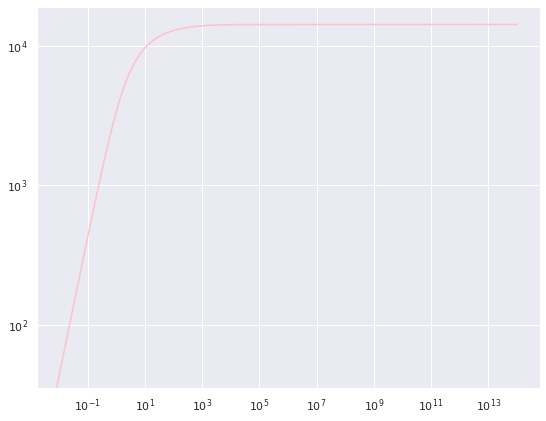

In [ ]:
plt.rcParams["figure.figsize"] = (9,7)
plt.plot(dataBackground[0], dataBackground[4], color = "pink")
plt.xscale("log")
plt.yscale("log")

plt.show()

In [ ]:
'''ruta = '/content/drive/MyDrive/Cosmology2022/class_public/output/'
nombreArchivo = 'default00_pk.dat'
lineas = []
with open( ruta + nombreArchivo , "r") as archivo:
    for linea in archivo:
        linea = linea.strip()
        linea = linea.split("* ")
        lineas.append(linea)

print(lineas)'''

'ruta = \'/content/drive/MyDrive/Cosmology2022/class_public/output/\'\nnombreArchivo = \'default00_pk.dat\'\nlineas = []\nwith open( ruta + nombreArchivo , "r") as archivo:\n    for linea in archivo:\n        linea = linea.strip()\n        linea = linea.split("* ")\n        lineas.append(linea)\n\nprint(lineas)'

Ahora intentamos la variación de los parametros del archivo de defaultCOPIA.

In [ ]:
ruta = '/content/drive/MyDrive/Cosmology2022/class_public/'
nombreArchivo = 'defaultCOPIA.ini'
dataDefault= np.genfromtxt(ruta + nombreArchivo, delimiter='\n', dtype=None)
#dataDEFAULT = np.loadtxt(ruta + nombreArchivo, dtype = float, delimiter=',')
'''with open( ruta + nombreArchivo , "r") as archivo:
    for linea in archivo:
      linea.split()
      linea.strip("\n")
      if type(linea) != str:
        print(linea)'''
print(dataDEFAULT[73])    #Linea del T_cmb

'''with open( ruta + nombreArchivo , "w") as archivo:
  i=0
  for linea in archivo:
    linea.split()
    linea.strip("\n")
    if i == 73:
      T_cmb = float(linea)
      T_cmb += 0.01
      archivo.write(T_cmb)
'''
#  dataDefault[73] = np.float(dataDefault[73])
#for i in range(0,100):
#   'var'+i=i

El intento fue fallido, intentaré hacerlo manualmente.

Ya que no pude convertir el defaultCOPIa.ini a np array de datos, decidí hacerlo manualmente, variando de 0.01 en 0.01 desde el original del archivo.

Empezamos variando la temperatura T_cmb del CMB y corriendo la linea siguiente para que me vaya guardando los archivos con los datos obtenidos de la variación.

In [ ]:
%%shell
./class defaultCOPIA.ini

Reading input parameters
 -> matched budget equations by adjusting Omega_Lambda = 0.690016
Running CLASS version v3.2.0
Computing background
 -> age = 13.769974 Gyr
 -> conformal age = 14137.185514 Mpc
 -> N_eff = 3.044 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 3057.391132
    corresponding to conformal time = 118.969559 Mpc
Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1061.037099
    corresponding to conformal time = 278.516845 Mpc
    with comoving sound horizon = 144.441236 Mpc
    angular diameter distance = 13.049138 Mpc
    sound horizon angle 100*theta_s = 1.042245
    Thomson optical depth crosses one at z_* = 1057.670615
    giving an angle 100*theta_* = 1.044510
 -> baryon drag stops at z = 1026.996059
    corresponding to conformal time = 285.427203 Mpc
    with comoving sound horizon rs = 147.611982 Mpc




1.   Haremos 2 a 9 para T_cmb
2.   Haremos 10 a 19 para omega_b
1.   Haremos 20 a 29 para h
2.   Haremos 30 a 39 para omega_cdm (materia oscura)






In [ ]:
ruta = '/content/drive/MyDrive/Cosmology2022/class_public/output/'
DATAS=[]
#Correr 10 veces o hasta tener defaultCOPIA09 para que funcione
for i in range(2,10): #No se guardó un archivo con 01
  nombreArchivo = 'defaultCOPIA0' + str(i) +'_cl.dat'
  data = np.loadtxt(ruta + nombreArchivo).T
  DATAS.append(data)
#print(data)

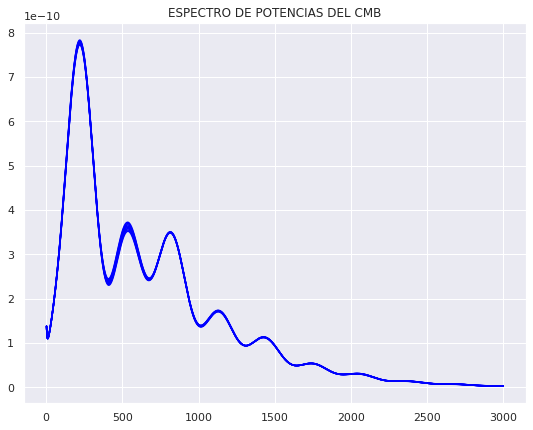

In [ ]:
plt.rcParams["figure.figsize"] = (9,7)
for i in range(len(DATAS)):
  plt.plot(DATAS[i][0], DATAS[i][1], color = "blue") #DATA0 = Z DATA1= TIEMPO PROPIO
plt.title("ESPECTRO DE POTENCIAS DEL CMB")
plt.show()

In [ ]:
ruta = '/content/drive/MyDrive/Cosmology2022/class_public/output/'
#nombreArchivo = 'defaultCOPIA00_pk.dat'
DATAS_=[]
#Correr 10 veces o hasta tener defaultCOPIA19 para que funcione
for i in range(2,10): #
  nombreArchivo = 'defaultCOPIA0' + str(i) +'_pk.dat'
  data = np.loadtxt(ruta + nombreArchivo).T
  DATAS_.append(data)
#print(data)

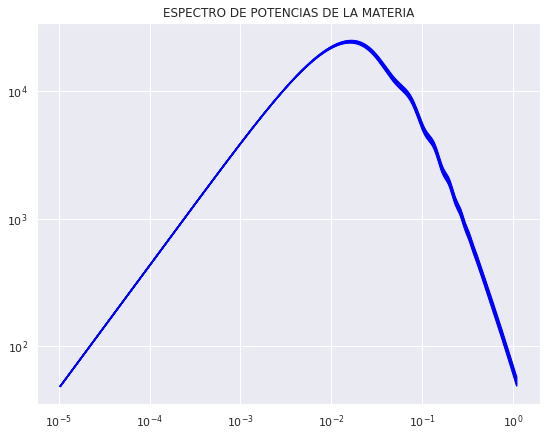

In [ ]:
plt.rcParams["figure.figsize"] = (9,7)
for i in range(len(DATAS_)):
  plt.plot(DATAS_[i][0], DATAS_[i][1], color = "blue") #DATA0 = Z DATA1= TIEMPO PROPIO
  plt.xscale("log")
  plt.yscale("log")
plt.title("ESPECTRO DE POTENCIAS DE LA MATERIA")
plt.show()

In [ ]:
%%shell
./class defaultCOPIA.ini
#Para omega_b

Me marcaban muchos errores al correr la linea anterior despues de modificar la *omega_b* de 0.01 en 0.01, sospecho que esto es debido a que CLASS no permite hacer esta combinacion de valor de omega_b con los demás parametros.

In [ ]:
ruta = '/content/drive/MyDrive/Cosmology2022/class_public/output/'
DATAS=[]
#Correr 10 veces o hasta tener defaultCOPIA19 para que funcione
for i in range(10,20): #No se guardó un archivo con 01
  try:
      nombreArchivo = 'defaultCOPIA' + str(i) +'_cl.dat'
      data = np.loadtxt(ruta + nombreArchivo).T
      DATAS.append(data)
  except OSError:
      print  ("Archivo no pudo crearse")

#print(data)

Archivo no pudo crearse
Archivo no pudo crearse
Archivo no pudo crearse
Archivo no pudo crearse
Archivo no pudo crearse
Archivo no pudo crearse
Archivo no pudo crearse
Archivo no pudo crearse
Archivo no pudo crearse


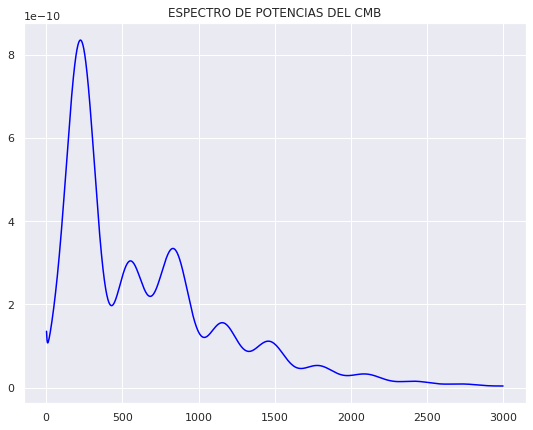

In [ ]:
plt.rcParams["figure.figsize"] = (9,7)
for i in range(len(DATAS)):
  plt.plot(DATAS[i][0], DATAS[i][1], color = "blue") #DATA0 = Z DATA1= TIEMPO PROPIO
plt.title("ESPECTRO DE POTENCIAS DEL CMB")
plt.show()

No lo haremos para el espectro de potencias de la materia ya que este no nos sacó datos

In [ ]:
%%shell
./class defaultCOPIA.ini
#Para h de 0.01 en 0.01

Reading input parameters
 -> matched budget equations by adjusting Omega_Lambda = 0.733843
Running CLASS version v3.2.0
Computing background
 -> age = 14.364949 Gyr
 -> conformal age = 15026.689745 Mpc
 -> N_eff = 3.044 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 2924.122770
    corresponding to conformal time = 131.282992 Mpc
Computing thermodynamics using HyRec 2020


Error in thermodynamics_init 
=>thermodynamics_init(L:344) :error in thermodynamics_helium_from_bbn(ppr,pba,pth);
=>thermodynamics_helium_from_bbn(L:610) :condition (omega_b < omegab[0]) is true; You have asked for an unrealistic small value omega_b = 2.238280e-03. The corresponding value of the primordial helium fraction cannot be found in the interpolation table. If you really want this value, you should fix YHe to a given value rather than to BBN


CalledProcessError: ignored

Intentando variar h, obtuve errores que me indicaban que eran en la parte de termodinámica, nuevamente me parece que es debido a la combinación de parametros que no me permite obtener datos, podria ser por que es un universo no realista?

Por ultimo intentaré variar omega_cdm

In [ ]:
%%shell
./class defaultCOPIA.ini
#Para h de 0.01 en 0.01

/bin/bash: ./class: No such file or directory


CalledProcessError: ignored

Nuevamente tengo los mismos errores.
Me parece curioso que si haya podido obtener los espectros de materia y de CMB para variaciones en la temperatura, pero no para las densidades. 

Como otra vez tuve que borrar todo para cargarlo, las graficas anteriores las dejaré de esa manera y no las correré.

intento 2 de hacerlo automatico:

In [ ]:
ruta = '/content/drive/MyDrive/Cosmology2022/class_public/'
nombreArchivo = 'defaultCOPIA.ini'
dataDefault= np.genfromtxt(ruta + nombreArchivo, delimiter='\n', dtype=None)
#dataDEFAULT = np.loadtxt(ruta + nombreArchivo, dtype = float, delimiter=',')
with open( ruta + nombreArchivo , "r") as archivo:
    linea = archivo.readlines()

#print(linea[73])   
prueba= linea[73]
prueba = np.array(prueba)
prueba=float(prueba)

'''
print(dataDEFAULT[73])    #Linea del T_cmb
'''
'''with open( ruta + nombreArchivo , "w") as archivo:
  i=0
  for linea in archivo:
    linea.split()
    linea.strip("\n")
    if i == 73:
      T_cmb = float(linea)
      T_cmb += 0.01
      archivo.write(T_cmb)
'''
#  dataDefault[73] = np.float(dataDefault[73])
#for i in range(0,100):
#   'var'+i=i

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: ignored

************************************************************************************************************************************************************************************************
Espacio final del make clean.
************************************************************************************************************************************************************************************************

In [ ]:
#%%shell
#make clean #Hacer make clean para borrar archivos pero solo en el caso donde ./class default.ini no corra
###No hacer a menos que sea necesario

rm -rf /content/drive/MyDrive/Cosmology2022/class_public/build;
rm -f libclass.a
rm -f /content/drive/MyDrive/Cosmology2022/class_public/python/classy.c
rm -rf /content/drive/MyDrive/Cosmology2022/class_public/python/build
rm -f python/autosetup.py


In [ ]:
#%%shell
#make clean

if ! [ -e /content/drive/MyDrive/Cosmology2022/class_public/build ]; then mkdir /content/drive/MyDrive/Cosmology2022/class_public/build ; mkdir /content/drive/MyDrive/Cosmology2022/class_public/build/lib; fi;
touch build/.base
rm -rf /content/drive/MyDrive/Cosmology2022/class_public/build;
rm -f libclass.a
rm -f /content/drive/MyDrive/Cosmology2022/class_public/python/classy.c
rm -rf /content/drive/MyDrive/Cosmology2022/class_public/python/build
rm -f python/autosetup.py
